<a href="https://colab.research.google.com/github/Ruhylll/hyfinbootcamp/blob/main/secoundWeek/SamsungStochasticFinall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

level1. 각자의 종목 캔들차트에 5일 20일 이동평균선을 그려보세요.(개인과제)

In [1]:
!pip install mplfinance
import requests
import pandas as pd
from datetime import datetime, timedelta
import mplfinance as mpf
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [18]:
url = "http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Referer": "http://data.krx.co.kr/contents/MDC/MDI/mdiLoader",
    "X-Requested-With": "XMLHttpRequest"
}

params = {
    "bld": "dbms/MDC/STAT/standard/MDCSTAT01501",
    "isuCd": "005930",
    "mktId": "STK",
    "trdDd": "20250804",   # 기준일 (이 날짜까지의 데이터)
    "share": "1",
    "money": "1",
    "csvxls_isNo": "false"
}

res = requests.get(url, params=params, headers=headers)

In [16]:
# 오늘 날짜와 한 달 전 (예시: 2025-09-26 기준)
today = datetime.strptime("2025-08-29", "%Y-%m-%d")
one_year_ago = today - timedelta(days=365)

all_data = [] ##구간으로 가져오는 함수가 작동하지 않아서 일별 데이터를 긁어와 한 리스트에 저장하기 위해

In [20]:
# 1. 날짜별로 반복 요청
for i in range(365): #3달간의 날짜 for문으로 반복실행
    day = one_year_ago + timedelta(days=i)
    trdDd = day.strftime("%Y%m%d") #가져오는 날짜

    params = {
        "bld": "dbms/MDC/STAT/standard/MDCSTAT01501",
        "mktId": "STK",
        "trdDd": trdDd, #strDd, endDd가 작동하지 않아 trdDd로 실
        "share": "1",
        "money": "1",
        "csvxls_isNo": "false"
    }
    res = requests.get(url, params=params, headers=headers) # http get request

    try:
        data = res.json().get("OutBlock_1", []) #res.text -> res.json 파싱
    except Exception: #예외처리로 exception  발생시 그냥 코드 실행
        continue

    samsung = [d for d in data if d["ISU_SRT_CD"] == "005930"] #삼성전자인 것만 리스트로 추출
    if samsung:
        row = samsung[0]

        # 휴장일 데이터('-') 처리
        if row["TDD_CLSPRC"] == "-": #주말에는 데이터가 없으므로, 오류가 난다. exeption 처리이다.
            continue

        all_data.append({
            "Date": day,
            "Close": float(row["TDD_CLSPRC"].replace(",", "")),
            "Open": float(row["TDD_OPNPRC"].replace(",", "")),
            "High": float(row["TDD_HGPRC"].replace(",", "")),
            "Low": float(row["TDD_LWPRC"].replace(",", "")),
            "Volume": float(row["ACC_TRDVOL"].replace(",", ""))
        })


In [31]:
# 2. DataFrame 변환
df = pd.DataFrame(all_data) #데이터프레임으로 변경
print(df)
df = df.set_index("Date").sort_index() #날짜에 따라 정렬

          Date    Close     Open     High      Low      Volume
0   2024-08-29  74000.0  73600.0  74700.0  73500.0  16884479.0
1   2024-08-30  74300.0  74400.0  75000.0  74100.0  16358520.0
2   2024-09-02  74400.0  74500.0  74700.0  73500.0  12641376.0
3   2024-09-03  72500.0  74100.0  74300.0  72500.0  16314599.0
4   2024-09-04  70000.0  69800.0  71100.0  69800.0  27366563.0
..         ...      ...      ...      ...      ...         ...
316 2025-08-22  71400.0  71700.0  71800.0  70800.0   9277432.0
317 2025-08-25  71500.0  71700.0  71800.0  71000.0  10345178.0
318 2025-08-26  70300.0  70800.0  71100.0  70300.0  14712519.0
319 2025-08-27  70600.0  70100.0  70900.0  69800.0  10523405.0
320 2025-08-28  69600.0  70100.0  70400.0  69600.0  11578024.0

[321 rows x 6 columns]


In [32]:
# 3. 이동평균선 계산
df["MA5"] = df["Close"].rolling(window=5).mean() #.rolling(window=5) 직전 5일간의 값들을 묶어서 계산 종가 부분을
df["MA20"] = df["Close"].rolling(window=20).mean() # ~~~
print(df.tail()) # ma5 와 ma20 확인

              Close     Open     High      Low      Volume      MA5     MA20
Date                                                                        
2025-08-22  71400.0  71700.0  71800.0  70800.0   9277432.0  70500.0  70430.0
2025-08-25  71500.0  71700.0  71800.0  71000.0  10345178.0  70800.0  70710.0
2025-08-26  70300.0  70800.0  71100.0  70300.0  14712519.0  70860.0  70705.0
2025-08-27  70600.0  70100.0  70900.0  69800.0  10523405.0  70880.0  70705.0
2025-08-28  69600.0  70100.0  70400.0  69600.0  11578024.0  70680.0  70555.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


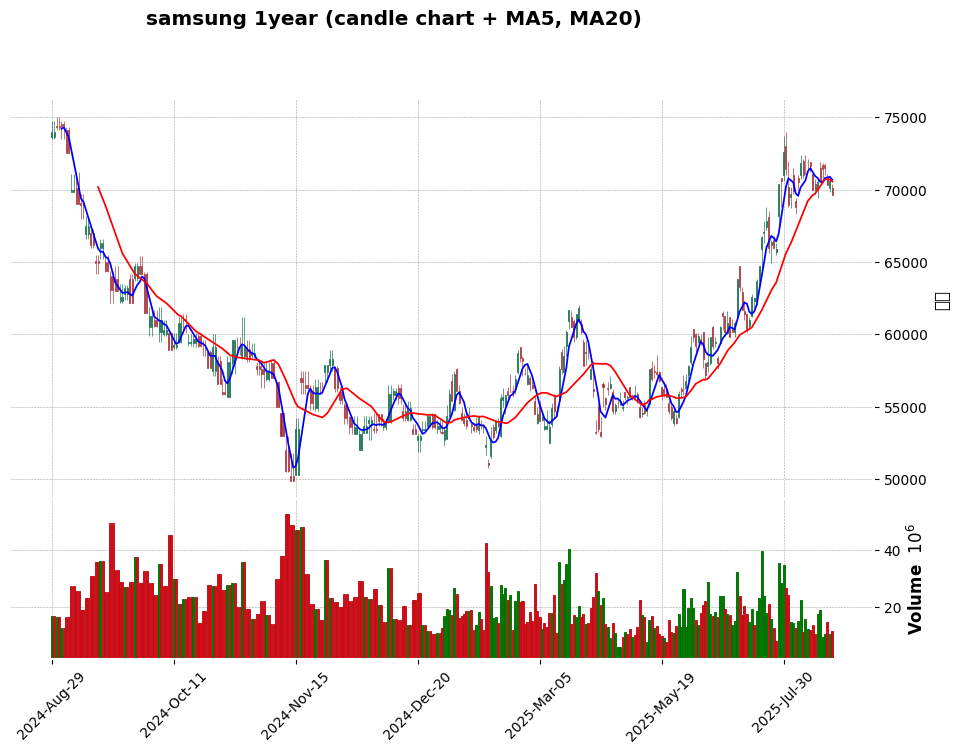

In [33]:
# 4. 캔들차트 + 이동평균선
apds = [
    mpf.make_addplot(df["MA5"], color="blue"), #캔들차트 위에 보조선 mpf.make_addplot
    mpf.make_addplot(df["MA20"], color="red")
]

mpf.plot(
    df,
    type="candle",
    style="charles",
    title="samsung 1year (candle chart + MA5, MA20)",
    ylabel="주가",
    volume=True,
    addplot=apds,
    figsize=(12, 8)
)

level2. 각자의 팀이 선택한 보조지표는 어떤 의미이며, 어떻게 계산되는 지표인가요? 또한 해당 지표를 코드로 시각화하여 각자 종목의 현재 상태를 해석해보세요 왜 그런 결과가 나왔을까요?(팀 과제)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.dates import DateFormatter

In [24]:
df = pd.DataFrame(all_data)
df['Date'] = pd.to_datetime(df['Date'])

14일 기준 스토캐스틱 Fast %K 계산

In [25]:
df['Lowest_N_Days'] = df['Low'].rolling(window=14).min()
df['Highest_N_Days'] = df['High'].rolling(window=14).max()
df['%K'] = (df['Close'] - df['Lowest_N_Days']) / (df['Highest_N_Days'] - df['Lowest_N_Days']) * 100

In [26]:
df['%D'] = df['%K'].rolling(window=3).mean()

Slow

In [27]:
df['Slow_%K'] = df['%K'].rolling(window=3).mean()
df['Slow_%D'] = df['Slow_%K'].rolling(window=3).mean()

figure

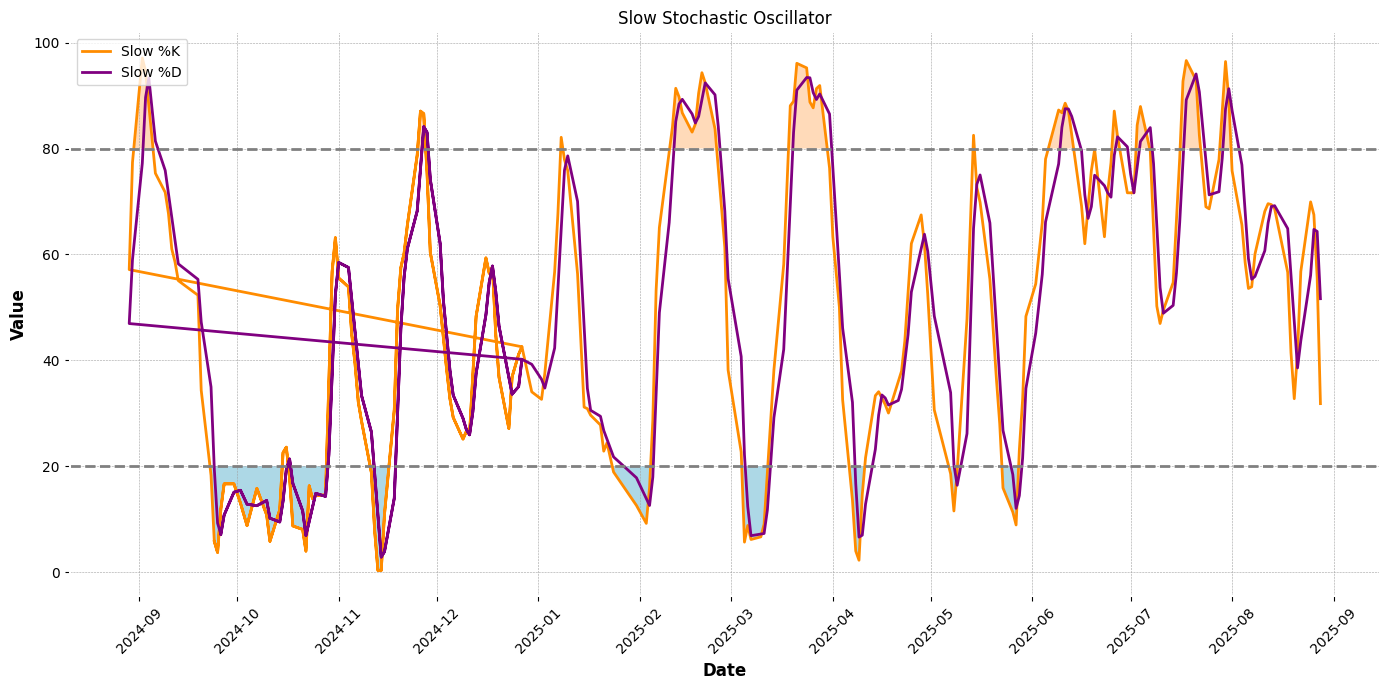

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Date'], df['Slow_%K'], color='darkorange', label='Slow %K')
ax.plot(df['Date'], df['Slow_%D'], color='purple', label='Slow %D')

ax.axhline(20, color='grey', linestyle='--')
ax.axhline(80, color='grey', linestyle='--')

ax.fill_between(df['Date'], df['Slow_%K'], 20, where=(df['Slow_%K'] <= 20), facecolor='lightblue', interpolate=True)
ax.fill_between(df['Date'], df['Slow_%K'], 80, where=(df['Slow_%K'] >= 80), facecolor='peachpuff', interpolate=True)

ax.set_title("Slow Stochastic Oscillator")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

plt.show()

%k와 %d plot 생성

In [ ]:
ax.plot(df['Date'], df['Slow_%K'], color='darkorange', label='Slow %K')
ax.plot(df['Date'], df['Slow_%D'], color='purple', label='Slow %D')

기준선 (20, 80) 추가

In [ ]:
ax.axhline(20, color='grey', linestyle='--')
ax.axhline(80, color='grey', linestyle='--')

조건부 영역 채우기

In [ ]:
ax.fill_between(df['Date'], df['Slow_%K'], 20, where=(df['Slow_%K'] <= 20), facecolor='lightblue', interpolate=True)

ax.fill_between(df['Date'], df['Slow_%K'], 80, where=(df['Slow_%K'] >= 80), facecolor='peachpuff', interpolate=True)

In [ ]:
ax.set_title("Slow Stochastic Oscillator")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>